# **Tarea Nº 2**

In [9]:
# Califiación: 15

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: Mateo Podestá y Marco Gregorio
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours

    b. Flew to Houston (IAH or HOU)

    c. Were operated by United, American, or Southwest

    d. Departed in spring (March, April, and June)

    e. Arrived more than two hours late, but didn’t leave late
    
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 
    
    g. Departed between midnight and 5am (inclusive)

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Solution
df = pd.read_csv("flights.csv")
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [3]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour'],
      dtype='object')

In [4]:
a = len(df[df.arr_delay>=3].index)
print(f"The number of flights that had an arrival delay of three or more hours is {a}")

b = len(df[df.dest.isin(["IAH","HOU"])].index)
print(f"The number of flights that flew to Houston (IAH or HOU) is {b}")

c = len(df[df.carrier.isin(["UA","AA","SA"])].index)
print(f"The number of flights that were operated by United, American, or Southwest is {c}")

d = len(df[df.month.between(3,6)].index)
print(f"The number of flights that departed in spring (March, April, May and June) is {d}")

e = len(df[(df.arr_delay>2) & (df.dep_delay<=0)].index)
print(f"The number of flights that arrived more than two hours late, but didn’t leave late is {e}")

f = len(df[(df.arr_delay>=1) & (df.air_time>30)].index)
print(f"The number of flights that were delayed by at least an hour, but made up over 30 minutes in flight {f}")

g = len(df[df.dep_time.between(0,500)].index)
print(f"The number of flights that departed between midnight and 5am (inclusive) {g}")



The number of flights that had an arrival delay of three or more hours is 123096
The number of flights that flew to Houston (IAH or HOU) is 9313
The number of flights that were operated by United, American, or Southwest is 91394
The number of flights that departed in spring (March, April, May and June) is 114203
The number of flights that arrived more than two hours late, but didn’t leave late is 34583
The number of flights that were delayed by at least an hour, but made up over 30 minutes in flight 132563
The number of flights that departed between midnight and 5am (inclusive) 1487


In [1]:
# Grading: -0.5
# a. it should be 60*3
# g. ==2400 (midnight) and <500 (before 5am)

2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [5]:
# Solution
res_2 = df.dep_time.isna().sum()
print(f"{res_2} flights have a missing dep_time")

8255 flights have a missing dep_time


3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [6]:
# Solution (i dont understad what 2000 == 1800 is supossed to mean)
df[df.arr_time==1800].dep_time.isna().sum()
#The are no longer any missing values :)

0

In [7]:
df[df.arr_time==1800].dep_time.count()
#There are still observations with arr_time=1800 so we know that the lack of missing values is not due to
#a lack of any value

407

4. What does `False & None` evaluate to? Why?

In [8]:
# Solution
print("False indicates the false value of a boolean (0 if it was a dummy), while None indicates that no value is given to the boolean (similar to NaN)")

False indicates the false value of a boolean (0 if it was a dummy), while None indicates that no value is given to the boolean (similar to NaN)


## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [9]:
# Solution
#a: by selecting the columns one by one
df[["dep_time","dep_delay","arr_time","arr_delay"]]

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


In [10]:
#b: same as a, but using the loc function. This is unnecesarily complicated
df.loc[:,["dep_time","dep_delay","arr_time","arr_delay"]]

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


In [11]:
#c: same as a, but using filter. Also unncesarily complicated
df.filter(items=["dep_time","dep_delay","arr_time","arr_delay"])

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [12]:
# Solution
df.sort_values(by="arr_delay", ascending=False).head(1)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [6]:
# Solution
df[["tailnum","time_hour","dep_delay"]].sort_values(by="dep_delay").head(5)

,tailnum,time_hour,dep_delay
89673,N592JB,2013-12-07 21:00:00,-43.0
113633,N612DL,2013-02-03 20:00:00,-33.0
64501,N825AS,2013-11-10 14:00:00,-32.0
9619,N934DL,2013-01-11 19:00:00,-30.0
24915,N208FR,2013-01-29 17:00:00,-27.0


8. How could you sort all missing values to the start? 

In [7]:
# Solution: using na_position="first"
df[["tailnum","time_hour","dep_delay"]].sort_values(by="dep_delay", na_position="first")

,tailnum,time_hour,dep_delay
838,N18120,2013-01-01 16:00:00,NaN
839,N3EHAA,2013-01-01 19:00:00,NaN
840,N3EVAA,2013-01-01 15:00:00,NaN
841,N618JB,2013-01-01 06:00:00,NaN
1777,N10575,2013-01-02 15:00:00,NaN
...,...,...,...
270376,N665MQ,2013-07-22 16:00:00,1005.0
327043,N338AA,2013-09-20 18:00:00,1014.0
8239,N517MQ,2013-01-10 16:00:00,1126.0
235778,N504MQ,2013-06-15 19:00:00,1137.0


## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [46]:
# Solution
#dep_time and arr_time are coded in say that 544 mean 5:44am. So, the whole part of dividing the variables by 100 is
#the number of hourse, and the residual is the number of minutes.

df["dep_time_min"] = (df.dep_time//100)*60 + df.dep_time%100
df["arr_time_min"] = (df.arr_time//100)*60 + df.arr_time%100

df[["dep_time_min","dep_time","arr_time_min","arr_time"]]

,dep_time_min,dep_time,arr_time_min,arr_time
0,317.0,517.0,510.0,830.0
1,333.0,533.0,530.0,850.0
2,342.0,542.0,563.0,923.0
3,344.0,544.0,604.0,1004.0
4,354.0,554.0,492.0,812.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

In [70]:
# Solution
import matplotlib.pyplot as plt

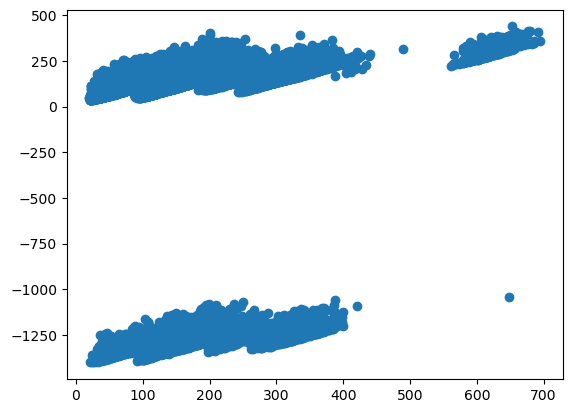

In [71]:
df["time_dif_min"] = df.arr_time_min - df.dep_time_min
plt.scatter(df.air_time,df.time_dif_min)

11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [17]:
# Solution
#Two possible explanations:
#a: departure and arrival times may be recorded in different timezones
#b: MAYOR: if a flight takes off in one day and lands the day after, arr_time_min - dep_time_min
#stops representing the number of minutes the flight took.

12. Implement your fix to the major probelm. Remake the plot from the previous question.

In [8]:
df.arr_time_min+1440

AttributeError: 'DataFrame' object has no attribute 'arr_time_min'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18244\427670832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_dif_min"][df.time_dif_min<0] = (df.arr_time_min+1440) - (df.dep_time_min)


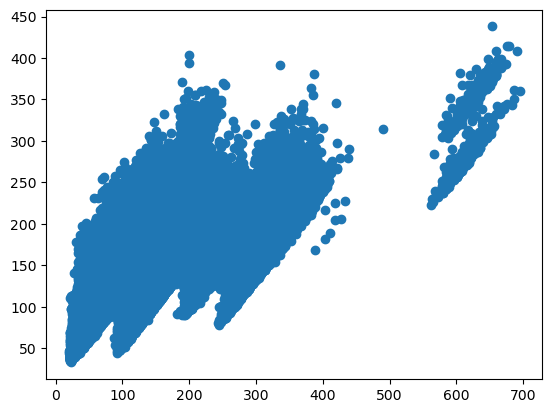

In [73]:
# Solution
df["time_dif_min"][df.time_dif_min<0] = (df.arr_time_min+1440) - (df.dep_time_min) #we add 1440 min to the arr time if the differnece between both values is negative, meaning the day has changed
plt.scatter(df.air_time,df.time_dif_min)

13. Find the 10 most delayed flights 

In [77]:
# Solution
df.sort_values(by="dep_delay", ascending=False).head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,dep_time_min,arr_time_min,time_dif_min
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,...,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00,401.0,762.0,361.0
235778,235779,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,...,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00,872.0,967.0,95.0
8239,8240,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,...,EWR,ORD,111.0,719,16,35,2013-01-10 16:00:00,681.0,759.0,78.0
327043,327044,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,...,JFK,SFO,354.0,2586,18,45,2013-09-20 18:00:00,699.0,897.0,198.0
270376,270377,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,...,JFK,CVG,96.0,589,16,0,2013-07-22 16:00:00,525.0,644.0,119.0
173992,173993,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,...,JFK,TPA,139.0,1005,19,0,2013-04-10 19:00:00,660.0,822.0,162.0
151974,151975,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,...,LGA,MSP,167.0,1020,8,10,2013-03-17 08:00:00,1401.0,95.0,134.0
247040,247041,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,...,JFK,PDX,313.0,2454,19,0,2013-06-27 19:00:00,599.0,756.0,157.0
270987,270988,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,...,LGA,ATL,109.0,762,7,59,2013-07-22 07:00:00,1377.0,81.0,144.0
87238,87239,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,...,EWR,MIA,149.0,1085,17,0,2013-12-05 17:00:00,476.0,658.0,182.0


## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [20]:
# Solution

15. Which plane (`tailnum`) has the most minutes of delays total?

In [21]:
# Solution

16. Which airlines only offer flights from New York to one other airport?

In [22]:
# Solution

17. Calculate the median arrival delay by airline.

In [23]:
# Solution

18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


In [24]:
# Solution

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

In [25]:
# Solution

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [26]:
# Solution